In [102]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
%matplotlib inline
import pandas as pd
import matplotlib as plt
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [103]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [104]:
engine = sqlalchemy.create_engine("sqlite:///hawaii.sqlite")
connection = engine.connect()
metadata = sqlalchemy.MetaData()
# create engine to hawaii.sqlite
#engine = create_engine("sqlite:///hawaii.sqlite")
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [105]:
Base.classes.keys()

['measurement', 'station']

In [106]:
# reflect an existing database into a new model
Measurement = Base.classes.measurement

# reflect the tables
Station = Base.classes.station
session = Session(engine)
results = session.query(Measurement.date, Measurement.prcp).all()

In [107]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [108]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [109]:
# Find the most recent date in the data set.
date_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date_recent

('2017-08-23',)

In [110]:
import datetime as dt
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
date_recent = dt.date (2017,8,23)
refrence_point = date_recent - dt.timedelta (days = 365) 
refrence_point

datetime.date(2016, 8, 23)

In [111]:
# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= refrence_point).all()
#for row in result:
   #print (": ",row.name, "Address:",row.address, "Email:",row.email)

result

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [112]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results,columns = ['date','prcp'])
df

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN
...,...,...
19545,2017-08-19,0.09
19546,2017-08-20,NaN
19547,2017-08-21,0.56
19548,2017-08-22,0.50


In [113]:
# Sort the dataframe by date
df.sort_values('date')

,date,prcp
0,2010-01-01,0.08
9007,2010-01-01,0.21
9518,2010-01-01,0.15
12187,2010-01-01,0.15
14959,2010-01-01,0.05
...,...,...
19548,2017-08-22,0.50
2723,2017-08-23,0.00
7634,2017-08-23,0.00
12186,2017-08-23,0.08


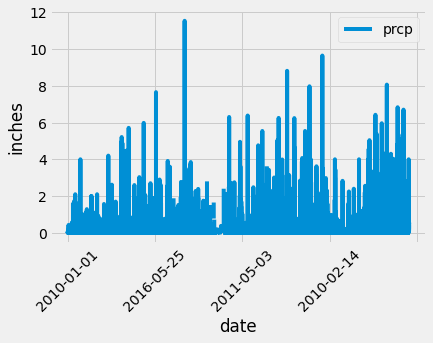

In [114]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x = 'date', y ='prcp', rot = 45)
plt.xlabel('date')
plt.ylabel('inches')
plt.show()

In [115]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [122]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.id).count()
station_count

9

In [123]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station,func.count(Measurement.id)]
active_stations = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [124]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.round(func.avg(Measurement.tobs),2)]
most_active_station = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()
print(f'The lowest temp is {most_active_station[0]}.  The highest temp is {most_active_station[1]}.  The average temp is {most_active_station[2]}.')

The lowest temp is 54.0.  The highest temp is 85.0.  The average temp is 71.66.


In [132]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



In [120]:
for result in results:
    print(result)


('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', None)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', None)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', None)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('20

('2014-04-29', 0.0)
('2014-04-30', 0.0)
('2014-05-01', 0.0)
('2014-05-02', 0.0)
('2014-05-03', 0.0)
('2014-05-04', 0.0)
('2014-05-05', 0.06)
('2014-05-06', 0.07)
('2014-05-07', 0.03)
('2014-05-08', None)
('2014-05-09', None)
('2014-05-10', 0.01)
('2014-05-11', 0.0)
('2014-05-12', 0.45)
('2014-05-13', 0.0)
('2014-05-14', 0.0)
('2014-05-15', 0.0)
('2014-05-16', 0.0)
('2014-05-17', 0.0)
('2014-05-18', 0.0)
('2014-05-19', 0.43)
('2014-05-20', 0.0)
('2014-05-21', 0.15)
('2014-05-22', None)
('2014-05-23', 0.0)
('2014-05-24', 0.0)
('2014-05-25', 0.76)
('2014-05-26', 0.05)
('2014-05-27', 0.01)
('2014-05-28', 0.03)
('2014-05-29', 0.0)
('2014-05-30', 0.0)
('2014-05-31', 0.0)
('2014-06-01', 0.0)
('2014-06-02', 0.66)
('2014-06-03', 0.01)
('2014-06-04', 0.0)
('2014-06-05', 0.0)
('2014-06-06', 0.0)
('2014-06-07', 0.03)
('2014-06-08', 0.0)
('2014-06-09', 0.0)
('2014-06-10', 0.0)
('2014-06-11', 0.0)
('2014-06-12', 0.0)
('2014-06-13', 0.0)
('2014-06-14', 0.0)
('2014-06-15', 0.01)
('2014-06-16', 0.0)
('

('2017-04-22', 0.32)
('2017-04-23', 0.03)
('2017-04-24', 0.0)
('2017-04-25', 0.0)
('2017-04-26', 0.0)
('2017-04-27', 0.0)
('2017-04-28', 0.0)
('2017-04-29', 0.12)
('2017-04-30', 0.89)
('2017-05-01', 0.26)
('2017-05-02', 0.0)
('2017-05-03', 0.0)
('2017-05-04', 0.0)
('2017-05-05', 0.0)
('2017-05-06', 0.0)
('2017-05-07', 0.0)
('2017-05-08', 0.0)
('2017-05-10', 0.0)
('2017-05-11', 0.01)
('2017-05-12', 0.0)
('2017-05-13', 0.0)
('2017-05-14', 0.0)
('2017-05-15', 0.05)
('2017-05-16', 0.01)
('2017-05-17', 0.0)
('2017-05-18', 0.01)
('2017-05-19', 0.0)
('2017-05-20', 0.0)
('2017-05-21', 0.0)
('2017-05-22', 0.0)
('2017-05-23', 0.08)
('2017-05-24', 0.13)
('2017-05-25', 0.15)
('2017-05-27', 0.01)
('2017-05-28', 0.02)
('2017-05-29', 0.0)
('2017-05-30', 0.26)
('2017-05-31', 0.02)
('2017-06-01', 0.0)
('2017-06-02', 0.0)
('2017-06-03', 0.02)
('2017-06-04', 0.0)
('2017-06-05', 0.0)
('2017-06-06', 0.0)
('2017-06-07', 0.0)
('2017-06-08', 0.0)
('2017-06-09', 0.0)
('2017-06-10', 0.04)
('2017-06-11', 0.08)
(

('2012-03-25', 0.03)
('2012-03-26', 0.03)
('2012-03-27', 0.12)
('2012-03-28', 0.01)
('2012-03-29', 0.0)
('2012-03-30', 0.0)
('2012-03-31', 0.0)
('2012-04-01', 0.0)
('2012-04-02', 0.0)
('2012-04-03', 0.0)
('2012-04-04', 0.03)
('2012-04-05', 0.02)
('2012-04-06', 0.0)
('2012-04-07', 0.15)
('2012-04-08', 0.0)
('2012-04-09', 0.11)
('2012-04-10', 0.03)
('2012-04-11', 0.17)
('2012-04-12', 0.03)
('2012-04-13', 0.02)
('2012-04-14', 0.0)
('2012-04-15', 0.05)
('2012-04-16', 0.04)
('2012-04-17', 0.0)
('2012-04-18', 0.0)
('2012-04-19', 0.0)
('2012-04-20', 0.02)
('2012-04-21', 0.02)
('2012-04-22', 0.03)
('2012-04-23', 0.11)
('2012-04-24', 0.02)
('2012-04-25', 0.02)
('2012-04-26', 0.02)
('2012-04-27', 0.28)
('2012-04-28', 0.0)
('2012-04-29', 0.0)
('2012-04-30', 0.0)
('2012-05-01', 0.02)
('2012-05-02', 0.13)
('2012-05-03', 0.11)
('2012-05-04', 0.06)
('2012-05-05', 0.1)
('2012-05-06', 0.0)
('2012-05-07', 0.05)
('2012-05-08', 0.0)
('2012-05-09', 0.0)
('2012-05-10', 0.0)
('2012-05-11', 0.04)
('2012-05-12

('2014-12-31', 0.72)
('2015-01-01', 0.01)
('2015-01-02', 0.01)
('2015-01-03', 1.46)
('2015-01-04', 0.02)
('2015-01-05', 0.0)
('2015-01-06', 0.07)
('2015-01-07', 0.0)
('2015-01-08', 0.0)
('2015-01-09', 0.0)
('2015-01-10', 0.04)
('2015-01-11', 0.0)
('2015-01-12', 0.0)
('2015-01-13', 0.0)
('2015-01-14', 0.0)
('2015-01-15', 0.0)
('2015-01-16', 0.01)
('2015-01-17', 0.0)
('2015-01-18', 0.0)
('2015-01-19', 0.0)
('2015-01-20', 0.0)
('2015-01-21', 0.0)
('2015-01-22', 0.0)
('2015-01-23', 0.0)
('2015-01-24', 0.09)
('2015-01-25', 0.46)
('2015-01-26', 0.73)
('2015-01-27', 0.01)
('2015-01-28', 0.09)
('2015-01-29', 0.0)
('2015-01-30', 0.02)
('2015-01-31', 0.0)
('2015-02-01', 0.0)
('2015-02-02', 0.0)
('2015-02-03', 0.0)
('2015-02-04', 0.77)
('2015-02-05', 0.0)
('2015-02-06', 0.0)
('2015-02-07', 0.0)
('2015-02-08', 0.0)
('2015-02-09', 0.0)
('2015-02-10', 0.1)
('2015-02-11', 0.0)
('2015-02-12', 0.0)
('2015-02-13', 0.0)
('2015-02-14', 0.13)
('2015-02-15', 0.8)
('2015-02-16', 0.0)
('2015-02-17', 0.0)
('20

('2010-05-31', 0.0)
('2010-06-01', 0.01)
('2010-06-02', 0.0)
('2010-06-03', 0.0)
('2010-06-04', 0.0)
('2010-06-05', 0.0)
('2010-06-06', 0.0)
('2010-06-07', 0.09)
('2010-06-08', 0.0)
('2010-06-09', 0.0)
('2010-06-10', 0.0)
('2010-06-11', 0.0)
('2010-06-12', 0.03)
('2010-06-13', 0.0)
('2010-06-14', 0.06)
('2010-06-15', 0.03)
('2010-06-16', 0.0)
('2010-06-17', 0.0)
('2010-06-18', 0.03)
('2010-06-19', 0.04)
('2010-06-20', 0.0)
('2010-06-21', 0.0)
('2010-06-22', 0.0)
('2010-06-23', 0.0)
('2010-06-24', 0.05)
('2010-06-25', 0.12)
('2010-06-27', None)
('2010-06-28', 0.18)
('2010-06-29', 0.06)
('2010-06-30', 0.03)
('2010-07-01', 0.02)
('2010-07-02', 0.32)
('2010-07-03', 0.16)
('2010-07-04', 0.08)
('2010-07-05', 0.0)
('2010-07-06', 0.15)
('2010-07-07', 0.09)
('2010-07-08', 0.14)
('2010-07-09', 0.01)
('2010-07-10', 0.06)
('2010-07-12', 0.0)
('2010-07-13', 0.0)
('2010-07-14', 0.03)
('2010-07-15', 0.13)
('2010-07-16', 0.02)
('2010-07-18', None)
('2010-07-19', 0.14)
('2010-07-20', 0.17)
('2010-07-21

('2014-11-19', 0.0)
('2014-11-20', 0.0)
('2014-11-21', 0.01)
('2014-11-22', 0.0)
('2014-11-23', 0.0)
('2014-11-24', 0.34)
('2014-11-25', 0.02)
('2014-11-26', 0.0)
('2014-11-27', 0.0)
('2014-11-28', 0.0)
('2014-11-29', 0.07)
('2014-11-30', 0.24)
('2014-12-01', 0.0)
('2014-12-02', 0.0)
('2014-12-03', 0.24)
('2014-12-04', 1.51)
('2014-12-05', 0.26)
('2014-12-06', 0.48)
('2014-12-08', None)
('2014-12-09', 0.0)
('2014-12-10', 0.0)
('2014-12-11', 0.1)
('2014-12-12', 0.07)
('2014-12-13', 0.0)
('2014-12-15', None)
('2014-12-16', 0.0)
('2014-12-17', 0.01)
('2014-12-18', 0.03)
('2014-12-19', 0.01)
('2014-12-20', 0.0)
('2014-12-22', None)
('2014-12-23', 0.58)
('2014-12-25', None)
('2014-12-29', None)
('2014-12-31', None)
('2015-01-01', 0.0)
('2015-01-02', 0.0)
('2015-01-03', 0.68)
('2015-01-04', 0.04)
('2015-01-05', 0.0)
('2015-01-06', 0.06)
('2015-01-07', 0.0)
('2015-01-08', 0.0)
('2015-01-09', 0.0)
('2015-01-11', None)
('2015-01-12', 0.0)
('2015-01-13', 0.0)
('2015-01-14', 0.0)
('2015-01-15', 0

('2011-01-28', 0.0)
('2011-01-31', 0.0)
('2011-02-01', None)
('2011-02-02', None)
('2011-02-03', None)
('2011-02-04', None)
('2011-02-07', None)
('2011-02-08', 1.6)
('2011-02-09', 0.0)
('2011-02-10', 0.02)
('2011-02-11', 0.57)
('2011-02-14', None)
('2011-02-15', 0.0)
('2011-02-16', 0.0)
('2011-02-17', 0.0)
('2011-02-18', 0.0)
('2011-02-22', None)
('2011-02-23', None)
('2011-02-24', None)
('2011-02-25', None)
('2011-02-28', None)
('2011-03-01', None)
('2011-03-02', None)
('2011-03-07', None)
('2011-03-08', None)
('2011-03-09', None)
('2011-03-10', None)
('2011-03-14', None)
('2011-03-15', None)
('2011-03-16', None)
('2011-03-30', 0.0)
('2011-03-31', 0.0)
('2011-04-01', 0.0)
('2011-04-04', 0.0)
('2011-04-05', 0.0)
('2011-04-06', 0.0)
('2011-04-07', 1.09)
('2011-04-11', None)
('2011-04-12', 0.0)
('2011-04-13', 0.0)
('2011-04-14', 0.01)
('2011-04-15', 0.0)
('2011-04-18', 0.0)
('2011-04-19', 0.0)
('2011-04-20', 0.0)
('2011-04-21', 0.0)
('2011-04-25', 0.0)
('2011-04-26', 0.0)
('2011-04-27', 

('2016-08-08', None)
('2016-08-09', None)
('2016-08-10', None)
('2016-08-11', None)
('2016-08-12', None)
('2016-08-15', None)
('2016-08-16', 0.0)
('2016-08-17', 0.0)
('2016-08-18', 0.0)
('2016-08-22', None)
('2016-08-23', None)
('2016-08-24', None)
('2016-08-25', 0.0)
('2016-08-26', 0.04)
('2016-08-29', None)
('2016-08-30', 0.02)
('2016-08-31', None)
('2016-09-01', None)
('2016-09-02', None)
('2016-09-08', None)
('2016-09-09', None)
('2016-09-12', None)
('2016-09-13', None)
('2016-09-14', None)
('2016-09-15', None)
('2016-09-16', 0.0)
('2016-09-19', None)
('2016-09-20', 0.0)
('2016-09-22', 0.06)
('2016-09-23', 0.0)
('2016-09-26', None)
('2016-09-28', 0.0)
('2016-09-29', 0.04)
('2016-09-30', None)
('2016-10-03', None)
('2016-10-04', None)
('2016-10-05', None)
('2016-10-06', 0.07)
('2016-10-07', None)
('2016-10-11', None)
('2016-10-13', None)
('2016-10-17', None)
('2016-10-18', None)
('2016-10-19', None)
('2016-10-20', None)
('2016-10-21', None)
('2016-10-24', None)
('2016-10-25', 0.4)
(

('2010-05-25', 0.0)
('2010-05-26', 0.08)
('2010-05-27', 0.0)
('2010-05-29', 0.0)
('2010-05-30', 0.0)
('2010-05-31', 0.0)
('2010-06-01', 0.03)
('2010-06-02', 0.0)
('2010-06-03', 0.0)
('2010-06-04', 0.0)
('2010-06-05', 0.0)
('2010-06-06', 0.0)
('2010-06-07', 0.0)
('2010-06-08', 0.01)
('2010-06-09', 0.0)
('2010-06-10', 0.0)
('2010-06-11', 0.0)
('2010-06-12', 0.0)
('2010-06-13', 0.0)
('2010-06-14', 0.0)
('2010-06-15', 0.0)
('2010-06-16', 0.0)
('2010-06-17', 0.0)
('2010-06-18', 0.14)
('2010-06-19', 0.0)
('2010-06-20', 0.0)
('2010-06-21', 0.0)
('2010-06-22', 0.0)
('2010-06-23', 0.0)
('2010-06-24', 0.0)
('2010-06-25', 0.08)
('2010-06-26', 0.08)
('2010-06-28', 0.0)
('2010-06-29', 0.0)
('2010-06-30', 0.0)
('2010-07-01', 0.13)
('2010-07-02', 0.14)
('2010-07-03', 0.09)
('2010-07-04', 0.05)
('2010-07-05', 0.01)
('2010-07-06', 0.08)
('2010-07-07', 0.21)
('2010-07-08', 0.02)
('2010-07-09', 0.06)
('2010-07-10', 0.1)
('2010-07-11', 0.0)
('2010-07-12', 0.0)
('2010-07-13', 0.0)
('2010-07-14', 0.04)
('20

('2012-11-17', 0.1)
('2012-11-18', 0.0)
('2012-11-19', 0.0)
('2012-11-20', 0.0)
('2012-11-21', 0.0)
('2012-11-22', 0.0)
('2012-11-23', 0.0)
('2012-11-24', 0.0)
('2012-11-25', 0.0)
('2012-11-26', 0.16)
('2012-11-27', 0.0)
('2012-11-28', 0.0)
('2012-11-29', 0.0)
('2012-11-30', 0.0)
('2012-12-01', 0.0)
('2012-12-02', 0.0)
('2012-12-03', 0.0)
('2012-12-04', 0.08)
('2012-12-05', 1.02)
('2012-12-06', 0.01)
('2012-12-07', 0.0)
('2012-12-08', 0.0)
('2012-12-09', 0.0)
('2012-12-10', 0.0)
('2012-12-11', 0.0)
('2012-12-12', 0.04)
('2012-12-13', 0.13)
('2012-12-14', 0.09)
('2012-12-15', 0.12)
('2012-12-16', 0.04)
('2012-12-17', 0.09)
('2012-12-18', 0.22)
('2012-12-19', 0.04)
('2012-12-20', 0.1)
('2012-12-21', 0.02)
('2012-12-22', 0.0)
('2012-12-23', 0.0)
('2012-12-24', 0.0)
('2012-12-25', 0.1)
('2012-12-26', 0.03)
('2012-12-27', 0.0)
('2012-12-28', 0.0)
('2012-12-29', 0.0)
('2012-12-30', 0.03)
('2012-12-31', 0.0)
('2013-01-01', 0.38)
('2013-01-02', 0.13)
('2013-01-03', 0.43)
('2013-01-04', 0.05)
(

('2016-09-28', 0.0)
('2016-09-29', 0.18)
('2016-09-30', 0.15)
('2016-10-01', 0.07)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('2016-10-12', 0.0)
('2016-10-13', 0.0)
('2016-10-14', 0.0)
('2016-10-15', 0.0)
('2016-10-16', 0.0)
('2016-10-17', 0.12)
('2016-10-18', 0.02)
('2016-10-19', 0.0)
('2016-10-21', None)
('2016-10-22', 0.0)
('2016-10-23', 0.0)
('2016-10-24', 0.0)
('2016-10-25', 0.12)
('2016-10-26', 0.02)
('2016-10-27', 0.08)
('2016-10-28', 0.06)
('2016-10-29', 0.01)
('2016-10-30', 0.0)
('2016-10-31', 0.13)
('2016-11-01', 0.01)
('2016-11-02', 0.0)
('2016-11-03', 0.0)
('2016-11-04', 0.0)
('2016-11-05', 0.02)
('2016-11-06', 0.0)
('2016-11-07', 0.0)
('2016-11-08', 0.15)
('2016-11-09', 0.0)
('2016-11-10', 0.0)
('2016-11-11', 0.0)
('2016-11-12', 0.0)
('2016-11-13', 0.0)
('2016-11-14', 0.0)
('2016-11-15', 0.0)
('2016-11-16', 0.07)
('20

('2011-11-27', 0.01)
('2011-11-28', 0.0)
('2011-11-29', 0.01)
('2011-11-30', 0.54)
('2011-12-01', 0.05)
('2011-12-02', 0.29)
('2011-12-03', 0.07)
('2011-12-04', 0.02)
('2011-12-05', 0.01)
('2011-12-06', 0.0)
('2011-12-07', 0.05)
('2011-12-08', 0.0)
('2011-12-09', 0.1)
('2011-12-10', 0.23)
('2011-12-11', 1.16)
('2011-12-12', 0.65)
('2011-12-13', 1.02)
('2011-12-14', 0.07)
('2011-12-15', 0.3)
('2011-12-16', 0.03)
('2011-12-17', 0.38)
('2011-12-18', 0.1)
('2011-12-19', 0.29)
('2011-12-20', 0.01)
('2011-12-21', 0.58)
('2011-12-22', 0.11)
('2011-12-23', 0.12)
('2011-12-24', 0.11)
('2011-12-25', 0.04)
('2011-12-26', 0.0)
('2011-12-27', 0.05)
('2011-12-28', 0.02)
('2011-12-29', 0.0)
('2011-12-30', 0.01)
('2011-12-31', 0.1)
('2012-01-01', 0.05)
('2012-01-02', 0.15)
('2012-01-03', 0.0)
('2012-01-04', 0.0)
('2012-01-05', 0.05)
('2012-01-06', 0.0)
('2012-01-07', 0.0)
('2012-01-08', 0.0)
('2012-01-09', 0.03)
('2012-01-10', 0.0)
('2012-01-11', 0.0)
('2012-01-12', 0.07)
('2012-01-13', 0.0)
('2012-01

('2014-09-28', 0.26)
('2014-09-29', 0.55)
('2014-09-30', 0.3)
('2014-10-01', 4.0)
('2014-10-02', 0.02)
('2014-10-03', 0.37)
('2014-10-04', 0.4)
('2014-10-05', 0.95)
('2014-10-06', 0.1)
('2014-10-07', 0.03)
('2014-10-08', 0.15)
('2014-10-09', 0.06)
('2014-10-10', 0.13)
('2014-10-11', 0.07)
('2014-10-12', 0.0)
('2014-10-13', 0.04)
('2014-10-14', 0.22)
('2014-10-15', 0.3)
('2014-10-16', 0.01)
('2014-10-17', 0.0)
('2014-10-18', 0.63)
('2014-10-19', 2.45)
('2014-10-20', 2.75)
('2014-10-21', 0.01)
('2014-10-22', 0.17)
('2014-10-23', 0.78)
('2014-10-24', 0.29)
('2014-10-25', 0.22)
('2014-10-26', 0.15)
('2014-10-27', 0.0)
('2014-10-28', 0.13)
('2014-10-29', 0.24)
('2014-10-30', 0.28)
('2014-10-31', 0.03)
('2014-11-01', 0.12)
('2014-11-02', 0.48)
('2014-11-03', 0.12)
('2014-11-04', 0.07)
('2014-11-05', 0.03)
('2014-11-06', 0.12)
('2014-11-07', 0.01)
('2014-11-08', 0.67)
('2014-11-09', 0.01)
('2014-11-10', 0.0)
('2014-11-11', 0.0)
('2014-11-12', 0.77)
('2014-11-13', 0.0)
('2014-11-14', 0.0)
('20

('2010-02-28', None)
('2010-03-01', 0.0)
('2010-03-02', 0.0)
('2010-03-03', 0.0)
('2010-03-04', 0.04)
('2010-03-05', 0.03)
('2010-03-06', 0.0)
('2010-03-07', 0.0)
('2010-03-08', 0.08)
('2010-03-09', 0.06)
('2010-03-10', 0.01)
('2010-03-11', 0.0)
('2010-03-12', 0.0)
('2010-03-14', 0.0)
('2010-03-15', 0.01)
('2010-03-16', 0.06)
('2010-03-17', 0.0)
('2010-03-18', 0.01)
('2010-03-19', 0.0)
('2010-03-20', 0.0)
('2010-03-21', 0.0)
('2010-03-22', 0.0)
('2010-03-23', 0.01)
('2010-03-24', 0.0)
('2010-03-25', 0.0)
('2010-03-26', 0.0)
('2010-03-27', 0.0)
('2010-03-28', 0.0)
('2010-03-29', 0.0)
('2010-03-30', 0.01)
('2010-03-31', 0.0)
('2010-04-01', 0.0)
('2010-04-02', 0.0)
('2010-04-03', 0.0)
('2010-04-04', 0.12)
('2010-04-05', 0.01)
('2010-04-06', 0.0)
('2010-04-07', 0.01)
('2010-04-08', 0.87)
('2010-04-09', 0.01)
('2010-04-10', 0.0)
('2010-04-11', 0.0)
('2010-04-12', 0.01)
('2010-04-13', 0.0)
('2010-04-14', 0.0)
('2010-04-15', 0.0)
('2010-04-16', 0.0)
('2010-04-17', 0.0)
('2010-04-18', 0.0)
('2

('2012-12-12', 0.0)
('2012-12-13', 0.0)
('2012-12-14', 0.15)
('2012-12-15', 0.0)
('2012-12-16', 0.0)
('2012-12-17', 0.0)
('2012-12-18', 0.02)
('2012-12-19', 0.0)
('2012-12-20', 0.0)
('2012-12-21', 0.0)
('2012-12-22', 0.01)
('2012-12-23', 0.0)
('2012-12-24', 0.0)
('2012-12-25', 0.0)
('2012-12-26', 0.0)
('2012-12-27', 0.0)
('2012-12-28', 0.0)
('2012-12-29', 0.0)
('2012-12-30', 0.0)
('2012-12-31', 0.0)
('2013-01-01', 0.0)
('2013-01-02', 0.01)
('2013-01-03', 0.13)
('2013-01-04', 0.01)
('2013-01-05', 0.0)
('2013-01-06', 0.0)
('2013-01-07', 0.01)
('2013-01-08', 0.0)
('2013-01-09', 0.01)
('2013-01-10', 0.0)
('2013-01-11', 0.0)
('2013-01-12', 0.0)
('2013-01-13', 0.0)
('2013-01-14', 0.01)
('2013-01-15', 0.53)
('2013-01-16', 0.0)
('2013-01-17', 0.0)
('2013-01-18', 0.0)
('2013-01-19', 0.0)
('2013-01-20', 0.0)
('2013-01-22', 0.0)
('2013-01-23', 0.0)
('2013-01-24', 0.03)
('2013-01-25', 0.1)
('2013-01-26', 0.08)
('2013-01-27', 0.2)
('2013-01-28', 1.57)
('2013-01-29', 0.03)
('2013-01-30', 0.04)
('201

('2010-03-18', 0.11)
('2010-03-19', 0.01)
('2010-03-20', 0.18)
('2010-03-21', 1.0)
('2010-03-22', 0.0)
('2010-03-23', 0.0)
('2010-03-24', 0.07)
('2010-03-25', 0.35)
('2010-03-26', 0.91)
('2010-03-27', 0.0)
('2010-03-28', 0.0)
('2010-03-29', 0.02)
('2010-03-30', 0.49)
('2010-03-31', 0.08)
('2010-04-01', 0.04)
('2010-04-02', 0.19)
('2010-04-03', 0.92)
('2010-04-04', 2.56)
('2010-04-05', 0.87)
('2010-04-06', 1.83)
('2010-04-07', 1.43)
('2010-04-08', 0.35)
('2010-04-09', 0.5)
('2010-04-10', 0.4)
('2010-04-11', 1.04)
('2010-04-12', 0.02)
('2010-04-13', 0.93)
('2010-04-14', 0.0)
('2010-04-15', 0.0)
('2010-04-16', 0.06)
('2010-04-17', 0.03)
('2010-04-18', 0.03)
('2010-04-19', 0.01)
('2010-04-20', 0.68)
('2010-04-21', 0.17)
('2010-04-23', None)
('2010-04-24', 0.17)
('2010-04-25', 0.08)
('2010-04-26', 0.0)
('2010-04-27', 0.0)
('2010-04-28', 0.49)
('2010-04-29', 1.29)
('2010-04-30', 0.92)
('2010-05-01', 0.31)
('2010-05-02', 0.37)
('2010-05-03', 0.14)
('2010-05-04', 0.21)
('2010-05-05', 0.01)
('2

('2013-03-12', 0.0)
('2013-03-13', 0.0)
('2013-03-14', 0.0)
('2013-03-15', 0.0)
('2013-03-16', 0.0)
('2013-03-17', 0.0)
('2013-03-18', 0.0)
('2013-03-19', 0.0)
('2013-03-20', 0.0)
('2013-03-21', 0.0)
('2013-03-22', 0.0)
('2013-03-23', 0.22)
('2013-03-24', 0.42)
('2013-03-25', 0.45)
('2013-03-26', 0.0)
('2013-03-27', 0.01)
('2013-03-28', 0.86)
('2013-03-29', 1.58)
('2013-03-30', 0.56)
('2013-04-01', None)
('2013-04-02', 0.0)
('2013-04-03', 0.0)
('2013-04-04', 0.36)
('2013-04-05', 0.0)
('2013-04-07', None)
('2013-04-08', 0.0)
('2013-04-09', 0.06)
('2013-04-10', 0.63)
('2013-04-11', 0.08)
('2013-04-12', 0.01)
('2013-04-13', 0.02)
('2013-04-14', 0.0)
('2013-04-15', 0.83)
('2013-04-16', 0.08)
('2013-04-17', 0.0)
('2013-04-18', 0.07)
('2013-04-19', 0.57)
('2013-04-20', 1.4)
('2013-04-21', 0.01)
('2013-04-22', 0.06)
('2013-04-23', 0.0)
('2013-04-24', 0.91)
('2013-04-25', 0.7)
('2013-04-26', 0.01)
('2013-04-28', None)
('2013-04-29', 0.0)
('2013-04-30', 0.0)
('2013-05-01', 0.53)
('2013-05-02', 

('2016-03-14', 0.16)
('2016-03-15', 0.57)
('2016-03-16', 0.37)
('2016-03-17', 0.0)
('2016-03-18', 0.07)
('2016-03-19', 0.22)
('2016-03-20', 0.0)
('2016-03-21', 0.0)
('2016-03-22', 0.0)
('2016-03-23', 0.0)
('2016-03-24', 0.0)
('2016-03-25', 0.1)
('2016-03-26', 0.09)
('2016-03-27', 0.0)
('2016-03-28', 0.0)
('2016-03-29', 0.04)
('2016-03-30', 0.02)
('2016-03-31', 0.0)
('2016-04-01', 0.02)
('2016-04-02', 0.0)
('2016-04-03', 0.0)
('2016-04-04', 0.29)
('2016-04-05', 0.0)
('2016-04-06', 0.73)
('2016-04-07', 0.56)
('2016-04-08', 0.29)
('2016-04-09', 0.14)
('2016-04-10', 0.06)
('2016-04-11', 0.38)
('2016-04-12', 0.8)
('2016-04-13', 0.33)
('2016-04-14', 0.72)
('2016-04-15', 0.51)
('2016-04-16', 0.3)
('2016-04-17', 0.51)
('2016-04-18', 5.09)
('2016-04-19', 0.01)
('2016-04-20', 0.19)
('2016-04-21', 0.14)
('2016-04-22', 0.23)
('2016-04-23', 0.77)
('2016-04-24', 0.99)
('2016-04-26', None)
('2016-04-27', 0.15)
('2016-04-28', 0.04)
('2016-04-29', 0.25)
('2016-04-30', 0.1)
('2016-05-01', 0.36)
('2016-0

In [121]:
# Close Session
session.close()